# **IMPORTING LIBRARIES**


In [81]:
import torch
import torchvision
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set(color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re,string
%matplotlib inline
from sklearn import model_selection, naive_bayes, svm

In [82]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
from nltk.stem.porter import PorterStemmer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
nlp = spacy.load("en_core_web_sm")

In [84]:
data = pd.read_csv("train.csv",header = 0)
data

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [85]:
data.isna().sum()

TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

In [86]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())

['Reconstructing Subject-Specific Effect Maps'
 'Rotation Invariance Neural Network'
 'Spherical polyharmonics and Poisson kernels for polyharmonic functions'
 ... 'Analysing Soccer Games with Clustering and Conceptors'
 'On the Efficient Simulation of the Left-Tail of the Sum of Correlated Log-normal Variates'
 'Why optional stopping is a problem for Bayesians']
["  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, n

In [87]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].value_counts())

Reconstructing Subject-Specific Effect Maps                                                                                           1
Can Deep Clinical Models Handle Real-World Domain Shifts?                                                                             1
Memory Efficient Experience Replay for Streaming Learning                                                                             1
Aspiration dynamics generate robust predictions in structured populations                                                             1
OAuthGuard: Protecting User Security and Privacy with OAuth 2.0 and OpenID Connect                                                    1
                                                                                                                                     ..
The exit time finite state projection scheme: bounding exit distributions and occupation measures of continuous-time Markov chains    1
The problem of boundary conditions for the shall

In [88]:
data.shape

(20968, 8)

# **PRE-PROCESSING**

In [93]:
data["Article"] = data[["TITLE", "ABSTRACT"]].apply("-".join, axis=1)
data

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Article
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps- ...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network- Rotation ...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...
...,...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,Contemporary machine learning: a guide for pra...
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,Uniform diamond coatings on WC-Co hard alloy c...
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,Analysing Soccer Games with Clustering and Con...
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,On the Efficient Simulation of the Left-Tail o...


In [94]:
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [95]:
data['Article']=pd.DataFrame(data.Article.apply(cleaned1))

In [96]:
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [97]:
from bs4 import BeautifulSoup

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [98]:
import re,string,unicodedata

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [99]:
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [100]:
data['Article']=data['Article'].apply(denoise_text)

In [101]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [102]:
data['Article']=data['Article'].apply(remove_special_characters)

In [103]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [104]:
data['Article']=data['Article'].apply(simple_stemmer)

In [105]:
from nltk.corpus import stopwords


#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{'before', 'those', 'doesn', 'wouldn', "wouldn't", "mustn't", 'mustn', 'have', 'their', 'own', "hasn't", "that'll", 'an', 'did', 'some', 'your', 'further', 'each', 'had', "wasn't", 'but', 'he', 'isn', 'to', 'y', 'needn', 'on', "you're", 'hadn', 'below', 'from', 'can', 'who', 'shouldn', 'once', 'by', 'll', 'my', 'it', 'under', "doesn't", 'are', 'yourself', 'over', 'will', 'just', 'now', 'i', 're', "shan't", 'aren', 'which', 'does', "should've", 'itself', "it's", 'other', 'through', 'any', "shouldn't", 'themselves', 'mightn', 'only', 'how', 'yourselves', 'not', 'm', 've', "don't", 'you', 'be', "haven't", "needn't", 'whom', 'there', "you've", "you'd", 'him', 'our', 'was', 'too', 'don', 'should', 'during', 'than', 'until', 'such', 'and', 'the', 'has', 'o', 'she', 'that', 'more', "hadn't", 'what', "aren't", 'down', 'ain', 'been', 'hasn', 'yours', 'when', 'few', 'these', 'nor', 'against', "won't", 'wasn', 'out', 'all', 'ours', 'do', 'weren', 'they', 'being', 'as', 'then', "she's", 'again', '

In [106]:
data['Article']=data['Article'].apply(remove_stopwords)

In [107]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer

def simple_stemmer(text):
    ps = SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])

In [108]:
data['Article'][0]

'reconstruct subjectspecif effect map predict model allow subjectspecif infer analyz diseas relat alter neuroimag data given subject data infer made two level global ie identifiy condit presenc subject local ie detect condit effect individu measur extract subject data global infer wide use local infer use form subjectspecif effect map rare use becaus exist model often yield noisi detect compos dispers isol island thi articl propos reconstruct method name rsm improv subjectspecif detect predict model approach particular binari classifi rsm specif aim reduc nois due sampl error associ use finit sampl exampl train classifi propos method wrappertyp algorithm use differ binari classifi diagnost manner ie without inform condit presenc reconstruct pose maximumaposteriori problem prior model whose paramet estim train data classifierspecif fashion experiment evalu perform synthet gener data data alzheim diseas neuroimag initi adni databas result synthet data demonstr use rsm yield higher detect

In [109]:
data

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Article
0,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,reconstruct subjectspecif effect map predict m...
1,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,rotat invari neural network rotat invari trans...
2,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,spheric polyharmon poisson kernel polyharmon f...
3,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,finit element approxim stochast maxwelllandaul...
4,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,compar studi discret wavelet transform wavelet...
...,...,...,...,...,...,...,...,...,...
20963,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0,contemporari machin learn guid practition phys...
20964,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0,uniform diamond coat wcco hard alloy cut inser...
20965,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0,analys soccer game cluster conceptor present n...
20966,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0,effici simul lefttail sum correl lognorm varia...


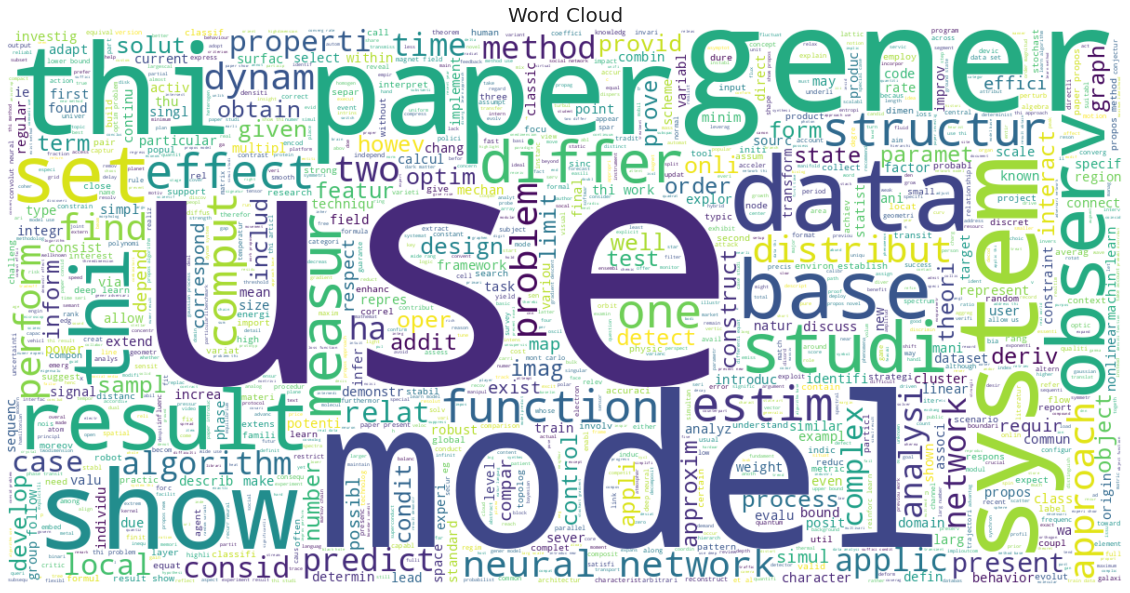

In [110]:
#word cloud for positive reviews
from wordcloud import WordCloud,STOPWORDS
positive_data = data['Article']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud',fontsize = 20)
plt.show()

# **TFIDF Vectors**

In [111]:
data1=data[{'Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance','Article'}]
data1

,Article,Physics,Statistics,Quantitative Biology,Quantitative Finance,Computer Science,Mathematics
0,reconstruct subjectspecif effect map predict m...,0,0,0,0,1,0
1,rotat invari neural network rotat invari trans...,0,0,0,0,1,0
2,spheric polyharmon poisson kernel polyharmon f...,0,0,0,0,0,1
3,finit element approxim stochast maxwelllandaul...,0,0,0,0,0,1
4,compar studi discret wavelet transform wavelet...,0,1,0,0,1,0
...,...,...,...,...,...,...,...
20963,contemporari machin learn guid practition phys...,1,0,0,0,1,0
20964,uniform diamond coat wcco hard alloy cut inser...,1,0,0,0,0,0
20965,analys soccer game cluster conceptor present n...,0,0,0,0,1,0
20966,effici simul lefttail sum correl lognorm varia...,0,1,0,0,0,1


In [112]:
print("\n\nWith TFIDFVectorizer")
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(data1.Article)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))


print("\n\nWith TFIDFVectorizer and removing stop words")
vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words),max_features=100)
X = vectorizer.fit_transform(data1.Article)
print(vectorizer.get_feature_names_out())
print(X.toarray())
print("\n")
#print(cosine_similarity(X))



With TFIDFVectorizer
['algorithm' 'also' 'analysi' 'appli' 'applic' 'approach' 'approxim'
 'base' 'bound' 'case' 'compar' 'complex' 'comput' 'condit' 'consid'
 'control' 'data' 'deep' 'demonstr' 'design' 'detect' 'develop' 'differ'
 'distribut' 'dynam' 'effect' 'effici' 'energi' 'equat' 'estim' 'exist'
 'experi' 'featur' 'field' 'find' 'first' 'framework' 'function' 'gener'
 'graph' 'group' 'ha' 'howev' 'imag' 'improv' 'inform' 'interact'
 'introduc' 'larg' 'learn' 'local' 'measur' 'method' 'model' 'network'
 'neural' 'new' 'number' 'observ' 'obtain' 'one' 'onli' 'oper' 'optim'
 'order' 'paper' 'paramet' 'perform' 'point' 'predict' 'present' 'problem'
 'process' 'properti' 'propos' 'provid' 'rate' 'recent' 'result' 'sampl'
 'set' 'show' 'simul' 'solut' 'space' 'state' 'structur' 'studi' 'system'
 'task' 'techniqu' 'test' 'theori' 'thi' 'time' 'train' 'two' 'use' 'well'
 'work']
[[0.06447927 0.05594038 0.         ... 0.32646359 0.         0.        ]
 [0.         0.1669633  0.        

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


['algorithm' 'analysi' 'appli' 'applic' 'approach' 'approxim' 'base'
 'bound' 'case' 'class' 'compar' 'complex' 'comput' 'condit' 'consid'
 'control' 'data' 'deep' 'demonstr' 'design' 'detect' 'develop' 'differ'
 'distribut' 'dynam' 'effect' 'effici' 'energi' 'equat' 'estim' 'exist'
 'experi' 'featur' 'field' 'find' 'framework' 'function' 'gener' 'graph'
 'group' 'ha' 'howev' 'imag' 'improv' 'inform' 'interact' 'introduc'
 'larg' 'learn' 'limit' 'linear' 'local' 'measur' 'method' 'model'
 'network' 'neural' 'new' 'number' 'object' 'observ' 'obtain' 'onli'
 'oper' 'optim' 'order' 'paper' 'paramet' 'perform' 'point' 'predict'
 'present' 'problem' 'process' 'properti' 'propos' 'provid' 'rate'
 'recent' 'relat' 'requir' 'result' 'sampl' 'set' 'simul' 'solut' 'space'
 'state' 'structur' 'studi' 'system' 'task' 'techniqu' 'test' 'theori'
 'thi' 'time' 'train' 'use' 'work']
[[0.06480765 0.         0.         ... 0.16479633 0.3281262  0.        ]
 [0.         0.         0.         ... 0.      

## **LOGISTIC REGRESSION**

In [29]:
X= data1['Article']
y=data1.drop("Article", axis=1)
X.head

<bound method NDFrame.head of 0        reconstruct subjectspecif effect map predict m...
1        rotat invari neural network rotat invari trans...
2        spheric polyharmon poisson kernel polyharmon f...
3        finit element approxim stochast maxwelllandaul...
4        compar studi discret wavelet transform wavelet...
                               ...                        
20963    contemporari machin learn guid practition phys...
20964    uniform diamond coat wcco hard alloy cut inser...
20965    analys soccer game cluster conceptor present n...
20966    effici simul lefttail sum correl lognorm varia...
20967    whi option stop problem bayesian recent option...
Name: Article, Length: 20968, dtype: object>

In [30]:
y

,Physics,Statistics,Quantitative Biology,Quantitative Finance,Computer Science,Mathematics
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,1,0,0,1,0
...,...,...,...,...,...,...
20963,1,0,0,0,1,0
20964,1,0,0,0,0,0
20965,0,0,0,0,1,0
20966,0,1,0,0,0,1


In [41]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [42]:
# Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
import sklearn
lg = sklearn.linear_model.LogisticRegression()

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
model =  MultiOutputClassifier(lg)

In [ ]:
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(X_test))*100))

Accuracy on test data: 63.4%


##XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
xgb = xgb.XGBClassifier()
model =  MultiOutputClassifier(xgb)
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(X_test))*100))

Accuracy on test data: 63.6%


##KNN

In [ ]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
tsh=KNeighborsClassifier(n_neighbors=5)
tsh.fit(X_train, y_train)
y_pred = tsh.predict(X_test)
y_pred

array([[0, 0, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(acc)

0.5739945954538229


##SVM

In [135]:
import sklearn
from sklearn.multioutput import MultiOutputClassifier
svm = sklearn.svm.SVC()

In [44]:
model =  MultiOutputClassifier(svm)

In [45]:
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [46]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(X_test))*100))

Accuracy on test data: 65.0%


# **WORD2VEC**


In [116]:
from gensim.models import Word2Vec

In [117]:
sentences = [review.split() for review in data['Article']]
model = Word2Vec(sentences, size=100, window=5, min_count=1, workers=4)
model.save('word2vec.model')

In [118]:
# Convert each word to vector and represent the sentence in vector form using the word embeddings
def sentence_vector(sentence,model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv.vocab]
    if len(word_vectors) == 0:
        return np.zeros((100,))
    return np.mean(word_vectors, axis=0)


##LOGISTIC REGRESSION



In [119]:
# Convert each sentence in the dataset to a vector using the Word2Vec model
word2vec_train = np.array([sentence_vector(sentence, model) for sentence in data1['Article']])
word2vec_test = np.array(y)

In [77]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(word2vec_train, word2vec_test, test_size=0.2, random_state=0)

In [ ]:
lg = sklearn.linear_model.LogisticRegression()

In [ ]:
model1 =  MultiOutputClassifier(lg)

In [ ]:
model1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model1.predict(X_test))*100))

Accuracy on test data: 63.5%


##XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
xgb = xgb.XGBClassifier()
model2 =  MultiOutputClassifier(xgb)
model2.fit(X_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model2.predict(X_test))*100))

Accuracy on test data: 66.7%


##SVM

In [69]:
model2=  MultiOutputClassifier(svm)

In [70]:
model2.fit(X_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [71]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model2.predict(X_test))*100))

Accuracy on test data: 66.2%


##KNN

In [78]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
yash=KNeighborsClassifier(n_neighbors=5)
yash.fit(X_train, y_train)
y_pred = yash.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6409155937052933


# **COMBINING TFIDF AND WORD2VEC**

In [113]:
def combine_vectors(doc):
    tfidf_vec = vectorizer.transform([doc])
    w2v_vec = sentence_vector(doc, model)
    combined_vec = np.concatenate([np.squeeze(tfidf_vec.toarray()), w2v_vec])
    return combined_vec

##LOGISTIC REGRESSION

In [120]:
combined_train = np.array([combine_vectors(doc) for doc in data['Article']])
combined_test = np.array(y)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(combined_train, combined_test, test_size=0.35, random_state=0)

In [ ]:
lg2 = sklearn.linear_model.LogisticRegression()

In [ ]:
model2 =  MultiOutputClassifier(lg2)

In [ ]:
model2.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

MultiOutputClassifier(estimator=LogisticRegression())

In [ ]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model2.predict(X_test))*100))

Accuracy on test data: 65.5%


##XGBOOST

In [152]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
xgb = xgb.XGBClassifier()
model =  MultiOutputClassifier(xgb)
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))

In [153]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model.predict(X_test))*100))

Accuracy on test data: 64.4%


##KNN

In [134]:
# Create a KNN
from sklearn.neighbors import KNeighborsClassifier
tsh=KNeighborsClassifier(n_neighbors=5)
tsh.fit(X_train, y_train)
y_pred = tsh.predict(X_test)
y_pred
# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print(acc)

0.634000953743443


##SVM

In [148]:
model3=  MultiOutputClassifier(svm)

In [149]:
model3.fit(X_train,y_train)

MultiOutputClassifier(estimator=SVC())

In [150]:
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, model3.predict(X_test))*100))

Accuracy on test data: 66.2%
